In [1]:
from util import daynight_helper
import matplotlib.pyplot as plt
import cv2
import numpy as np 

In [2]:

training_data_path = 'data/day_night_images/training'
training_data = daynight_helper.load_dataset(training_data_path)

Shape  (600, 1110, 3)
label:  1


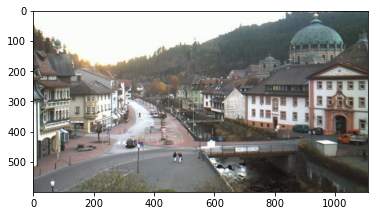

In [3]:
std_training_data = daynight_helper.standardize_inputs(training_data)

img = std_training_data[0][0]
label = std_training_data[0][1]
plt.imshow(img)
print('Shape ', img.shape)
print('label: ', label)

In [23]:
#feature extraction - brightness using hsv
def brightness_value(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    v_values = np.sum(hsv_img[:, :, 2])
    area = img.shape[0] * img.shape[1]

    avg_brightness = v_values/area

    return avg_brightness

day = 1, night - 0, label  1


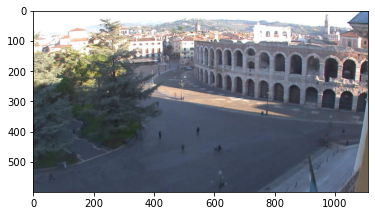

In [19]:
day_sample = std_training_data[100]
plt.imshow(day_sample[0])
print('day = 1, night - 0, label ', day_sample[1] )

day = 1, night - 0, label  0


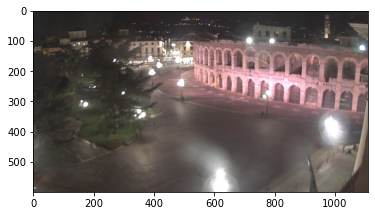

In [21]:
night_sample = std_training_data[120]
plt.imshow(night_sample[0])
print('day = 1, night - 0, label ', night_sample[1] )

In [48]:
def estimate_label(img, threshold):
    avg_brightness = brightness_value(img)

    predicted_label = 0
    threshold = threshold

    if avg_brightness > threshold:
        predicted_label = 1
    
    return predicted_label, avg_brightness

def optimize_threshold(img_data, threshold):
    img = img_data[0]
    label = img_data[1]

    threshold = threshold
    pred_label, avg_brightness = estimate_label(img, threshold)

    if pred_label == label:
        return threshold
    else: 
        return round((avg_brightness+threshold)/2)

In [69]:
threshold = 120

for i in range(0, len(std_training_data)):
    img_data = std_training_data[i]

    threshold = optimize_threshold(img_data, threshold)

    #print('threshold ', threshold)

In [64]:
import random

test_data_path = 'data/day_night_images/test'
test_data = daynight_helper.load_dataset(test_data_path)
test_data = daynight_helper.standardize_inputs(test_data)

random.shuffle(test_data)

threshold = 116

correctly_classified = []
misclassified = []

for i in range(0, len(test_data)):
    img_data = test_data[i]
    pred, avg_brightness = estimate_label(img_data[0], threshold)
    #print('predicted ', pred)
    label = img_data[1]

    #print('label ', label)

    if pred == label:
        correctly_classified.append(img_data)
    else: 
        misclassified.append(img_data)

In [65]:
print('total : ', len(test_data))
print('Correct predictions: ', len(correctly_classified))
print('Misclassified: ', len(misclassified))
print('Accuracy ', len(correctly_classified)/len(test_data))

total :  160
Correct predictions:  140
Misclassified:  20
Accuracy  0.875


label  1


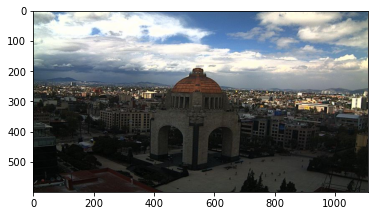

In [68]:
num = 0
misclassified_img = misclassified[num]
plt.imshow(misclassified_img[0])
print('label ', misclassified_img[1])

In [67]:
brightness_value(misclassified_img[0])

105.56271621621622